***Some standard libraries used throughout the project:***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#1. Importing CSV file and Some basic details 

***1.1 Loading CSV file into a pandas dataframe***

In [2]:
laptop=pd.read_csv('laptop_original.csv',encoding='Latin-1')
laptop.head()

,ï»¿,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


***Rename the first column as 'Unnamed: 0'***

In [3]:
laptop.rename(columns={'ï»¿':'Unnamed: 0'},inplace=True)

 'Unnamed: 0' column used to sort the graph parameters in data visualizations

***1.2 Dimension of the dataframe***

In [4]:
print("Row: ",laptop.shape[0])
print("Column: ",laptop.shape[1])

Row:  1303
Column:  13


***1.3 Overview of the data***

*First five rows:*

In [5]:
laptop.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


*Randomly selected five rows:*

In [6]:
laptop.sample(5)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1047,1047,MSI,GT72S Dominator,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78kg,1545.64
60,60,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,1299.00
962,962,Acer,Aspire F5-573G-510L,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,1009.00
17,17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2858.00
292,292,HP,17-BS037cl (i3-6006U/8GB/1TB/W10),Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.54kg,489.00


*Last five rows:*

In [7]:
laptop.tail()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


#2. Feature information

***2.1 Numerical features***

In [8]:
numeric=laptop.select_dtypes('number').columns
for i in numeric:
  print(i)

Unnamed: 0
Inches
Price_euros


***2.2 Statistical information of numerical features***

In [9]:
laptop.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


***2.3 Catagorical features***

In [10]:
objects=laptop.select_dtypes('object').columns
for i in objects:
  print(i)

Company
Product
TypeName
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight


***2.4 Number of unique value in each catagorical feature***

In [11]:
laptop[objects].nunique()

Company              19
Product             618
TypeName              6
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
dtype: int64

#3. Checking for Null and duplicated values

***3.1 Checking Null values***

In [12]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Sum of all Null values of every feature is Zero, so there are no Null values.

***3.2 Checking Duplicated values***

In [13]:
laptop.duplicated().sum()

0

*There is no duplicate value*

#4. Removing extra unnecessary details from product column

In [14]:
laptop["Product"] = laptop["Product"].str.split("(").apply(lambda x: x[0])
laptop[objects].nunique()

Company              19
Product             593
TypeName              6
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
dtype: int64

Still there are 593 unique value in 'Product' column. And the product name we can consider as a unnecessary details, so we can removed it.

***4.1 Removing 'Product' column from out dataset***

In [15]:
laptop=laptop.drop('Product',axis=1)
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#5. Extract CPU vender, CPU type, CPU speed from Cpu freature column

***5.1 Separate Cpu feature from dataframe***

In [16]:
Cpu=np.array(laptop['Cpu'])

***5.2 Spliting CPU vender, CPU type, CPU speed***

In [17]:
from numpy.core.defchararray import join
CpuVenderName=[]
CpuSpeed=[]
CpuType=[]
for i in range(Cpu.shape[0]):
  n=lambda x: x[0]
  s=lambda x: x[-1]
  t=lambda x: ' '.join(x[1:-1])
  CpuVenderName.append(n(Cpu[i].split(' ')))
  CpuSpeed.append(s(Cpu[i].split(' ')))
  CpuType.append(t(Cpu[i].split(' ')))

***5.3 Inserting three new column in the dataframe***

In [18]:
laptop.insert(loc=5,column='CpuVenderName',value=CpuVenderName)
laptop.insert(loc=6,column='CpuType',value=CpuType)
laptop.insert(loc=7,column='CpuSpeed',value=CpuSpeed)

***5.4 Removing Cpu feature column***

In [19]:
laptop=laptop.drop('Cpu',axis=1)


#6. Extract GPU vender, GPU type from Gpu freature column

***6.1 Separate Gpu feature from dataframe***

In [20]:
Gpu=np.array(laptop['Gpu'])

***6.2 Spliting GPU vender, GPU type, GPU speed***

In [21]:
GpuName=[]
GpuType=[]
for i in range(Gpu.shape[0]):
  n=lambda x: x[0]
  t=lambda x: ' '.join(x[1:-1])
  GpuName.append(n(Gpu[i].split(' ')))
  GpuType.append(t(Gpu[i].split(' ')))

***6.3 Inserting three new column in the dataframe***

In [22]:
laptop.insert(loc=10,column='GpuName',value=GpuName)
laptop.insert(loc=11,column='GpuType',value=GpuType)

***6.4 Removing Gpu feature column***

In [23]:
laptop=laptop.drop('Gpu',axis=1)


***6.5 Updated dataframe head***

In [24]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,GpuType,OpSys,Weight,Price_euros
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics,macOS,1.37kg,1339.69
1,1,Apple,Ultrabook,13.3,1440x900,Intel,Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics,macOS,1.34kg,898.94
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics,No OS,1.86kg,575.00
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro,macOS,1.83kg,2537.45
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics,macOS,1.37kg,1803.60


#7. Laptop price visualization

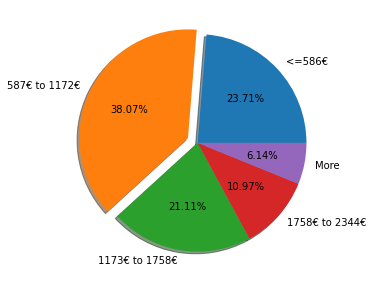

In [25]:
o=laptop.iloc[:,14]
a=[];b=[];c=[];d=[];g=[]
for i in range(laptop.shape[0]):
    if o[i]<=586:
        a.append(o[i])
    else:
        if o[i]<=1172:
            b.append(o[i])
        else:
            if o[i]<=1758:
                c.append(o[i])
            else:
                if o[i]<=2344:
                    d.append(o[i])
                else:
                    g.append(o[i])
                    
feature=[len(a),len(b),len(c),len(d),len(g)]
names=['<=586€','587€ to 1172€','1173€ to 1758€','1758€ to 2344€','More']
explode=[0,0.1,0,0,0]
plt.figure(figsize=(6,5))
plt.pie(feature, labels=names, shadow=True,autopct='%.2f%%',explode=explode)
plt.show()

As there are 23.71% laptops price under 586 euros(almost 50K in INR), 38.07% laptops price under 1172 euros(almost 100K in INR), 21.11% laptops prices under 1758 euros(almost 150K in INR), 10.97% laptops prices under 2344 euros(almost 200K in INR) and 6.14% laptops prices more than 2344 euros(almost more than 200K) are comparable.

#8. Data visualizations

***8.1 Company vs Number of Laptops***

Text(0.5, 1.0, 'Company vs Number of Laptop')

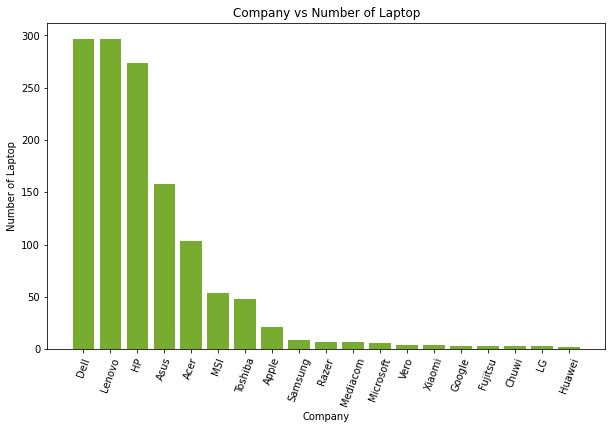

In [26]:
laptop2=laptop.groupby(['Company']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False) #To Count Unique data and sort them 
plt.figure(figsize=(10,6))      # To set the graph size
plt.bar(laptop2['Company'],laptop2['Unnamed: 0'],color=[0.4660, 0.6740, 0.1880])    #Selecting bar graph
plt.xticks(rotation=70)     # Rotating  xlabel name
plt.xlabel('Company')     # X-axis naming 
plt.ylabel('Number of Laptop')  # Y-axis naming 
plt.title('Company vs Number of Laptop') # Graph title

***8.2 Laptop Type vs Number of Laptop***

Text(0.5, 1.0, 'Laptop Types vs Number of Laptops')

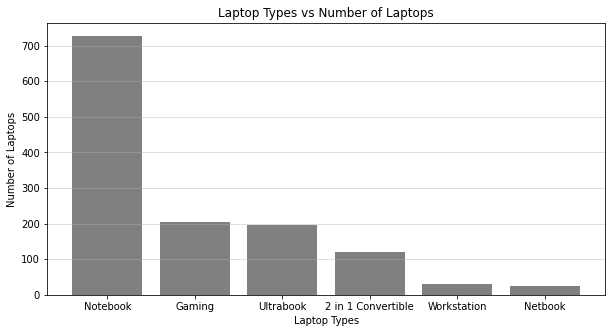

In [27]:
laptop2=laptop.groupby(['TypeName']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False)
plt.figure(figsize=(10,5))
plt.grid(axis='y',alpha=.5)
plt.bar(laptop2['TypeName'],laptop2['Unnamed: 0'],color='gray')
plt.xlabel('Laptop Types')
plt.ylabel('Number of Laptops')
plt.title('Laptop Types vs Number of Laptops')

***8.3 Inches vs Number of Laptops***

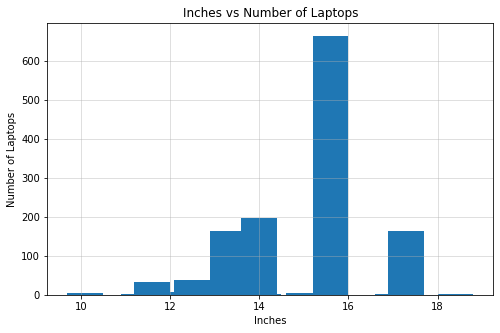

In [28]:
laptop2=laptop.groupby(['Inches']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False)
plt.figure(figsize=(8,5))
plt.bar(laptop2['Inches'],laptop2['Unnamed: 0'])
plt.xlabel('Inches')
plt.ylabel('Number of Laptops')
plt.title('Inches vs Number of Laptops')
plt.grid(alpha=.5)

15.6 inches laptops is more popular than other

***8.4 Number of Laptops vs ScreenResolution***

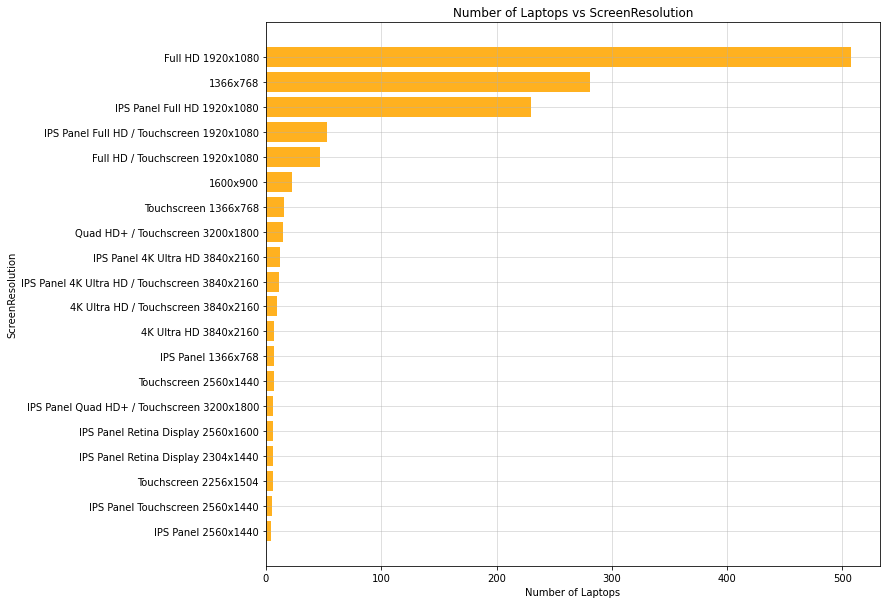

In [29]:
laptop2=laptop.groupby(['ScreenResolution']).count().reset_index().sort_values(by='Unnamed: 0',ascending=True).tail(20)
plt.figure(figsize=(11,10))
plt.barh(laptop2['ScreenResolution'],laptop2['Unnamed: 0'],color= 	[0.9990, 0.6940, 0.1250])
plt.ylabel('ScreenResolution')
plt.xlabel('Number of Laptops')
plt.title('Number of Laptops vs ScreenResolution')
plt.grid(alpha=.5)

Most of the laptop used 'Full HD 1920x1080' resoluted screen

***8.5 Number of Laptop vs CpuVenderName***

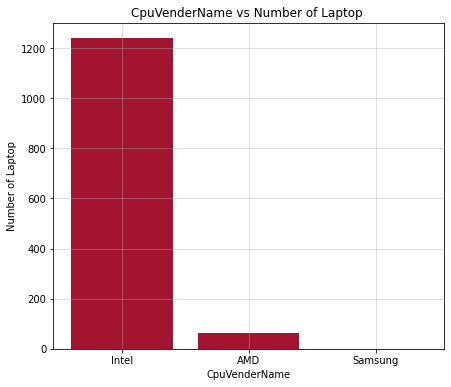

In [30]:
laptop2=laptop.groupby(['CpuVenderName']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False)
plt.figure(figsize=(7,6))
plt.bar(laptop2['CpuVenderName'],laptop2['Unnamed: 0'],color=	[0.6350, 0.0780, 0.1840])
plt.ylabel('Number of Laptop')
plt.xlabel('CpuVenderName')
plt.title('CpuVenderName vs Number of Laptop ')
plt.grid(alpha=.5)

***8.6 Number of Laptop vs CpuType (Top 20)***

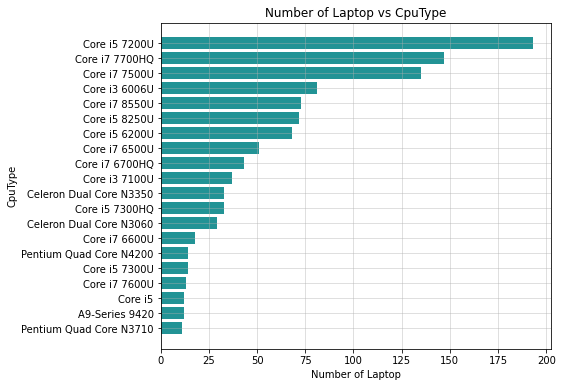

In [31]:
laptop2=laptop.groupby(['CpuType']).count().reset_index().sort_values(by='Unnamed: 0',ascending=True).tail(20)
plt.figure(figsize=(7,6))
plt.barh(laptop2['CpuType'],laptop2['Unnamed: 0'],color=	[0.1350, 0.5780, 0.5840])
plt.xlabel('Number of Laptop')
plt.ylabel('CpuType')
plt.title('Number of Laptop vs CpuType')
plt.grid(alpha=.5)

***8.7 Number of Laptop vs CpuSpeed***

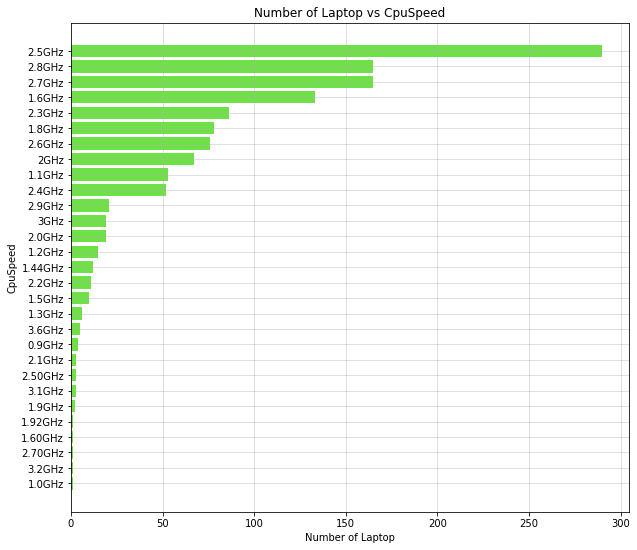

In [32]:
laptop2=laptop.groupby(['CpuSpeed']).count().reset_index().sort_values(by='Unnamed: 0',ascending=True)
plt.figure(figsize=(10,9))
plt.barh(laptop2['CpuSpeed'],laptop2['Unnamed: 0'],color=	[0.4350, 0.8780, 0.2840])
plt.xlabel('Number of Laptop')
plt.ylabel('CpuSpeed')
plt.title('Number of Laptop vs CpuSpeed')
plt.grid(alpha=.5)

***8.8 Number of Laptop vs GpuName***

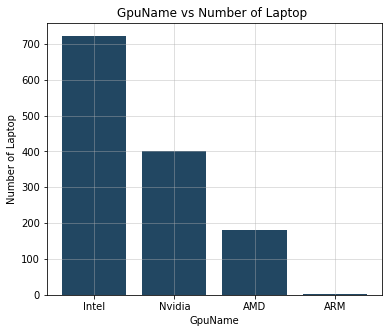

In [33]:
laptop2=laptop.groupby(['GpuName']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False)
plt.figure(figsize=(6,5))
plt.bar(laptop2['GpuName'],laptop2['Unnamed: 0'],color=	[0.1350, 0.2780, 0.3840])
plt.ylabel('Number of Laptop')
plt.xlabel('GpuName')
plt.title('GpuName vs Number of Laptop ')
plt.grid(alpha=.5)

***8.9 Number of Laptop vs GpuType***

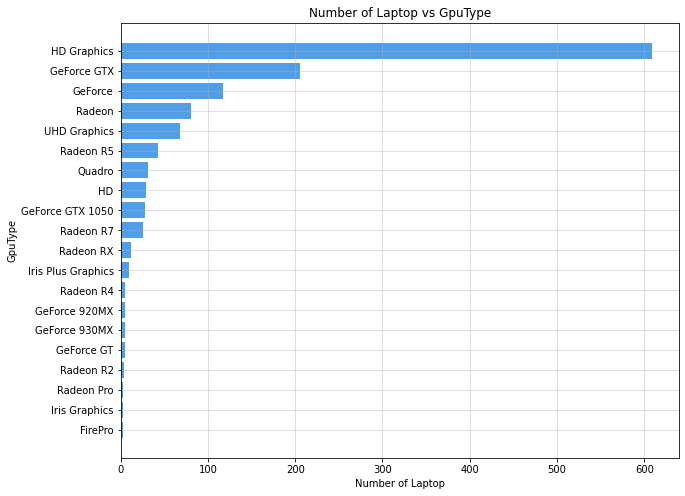

In [34]:
laptop2=laptop.groupby(['GpuType']).count().reset_index().sort_values(by='Unnamed: 0',ascending=True).tail(20)
plt.figure(figsize=(10,8))
plt.barh(laptop2['GpuType'],laptop2['Unnamed: 0'],color=	[0.3150, 0.6180, 0.9140])
plt.xlabel('Number of Laptop')
plt.ylabel('GpuType')
plt.title('Number of Laptop vs GpuType')
plt.grid(alpha=.5)

***8.10 RAM vs Number of Laptop***

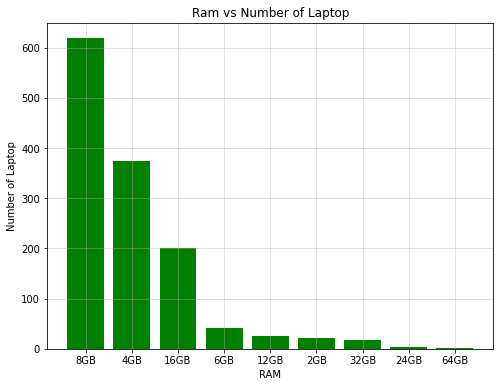

In [35]:
laptop2=laptop.groupby(['Ram']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False).head(20)
plt.figure(figsize=(8,6))
plt.bar(laptop2['Ram'],laptop2['Unnamed: 0'],color=[0, 0.5, 0])
plt.xlabel('RAM')
plt.ylabel('Number of Laptop')
plt.title('Ram vs Number of Laptop')
plt.grid(alpha=.5)

Most of the laptop build with 8GB RAM

***8.11 Number of Laptop vs Storage***

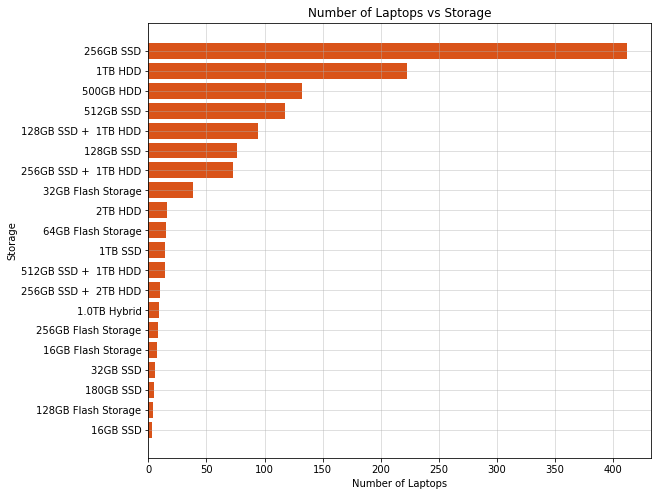

In [36]:
laptop2=laptop.groupby(['Memory']).count().reset_index().sort_values(by='Unnamed: 0',ascending=True).tail(20)
plt.figure(figsize=(9,8))
plt.barh(laptop2['Memory'],laptop2['Unnamed: 0'],color=[0.8500, 0.3250, 0.0980])
plt.xlabel('Number of Laptops')
plt.ylabel('Storage')
plt.title('Number of Laptops vs Storage')
plt.grid(alpha=.5)

256GB SSD as a storage device is more uses than other

***8.12 OS vs Number of Laptops***

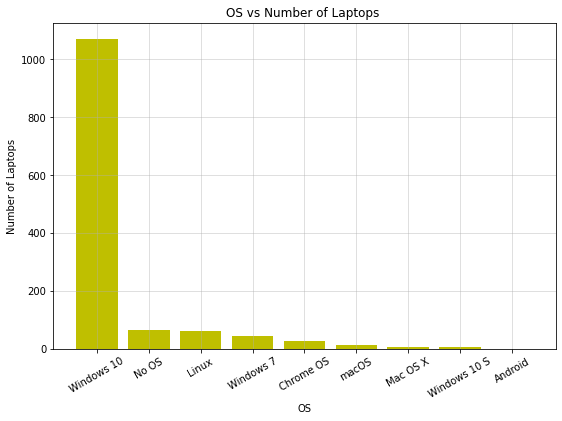

In [37]:
laptop2=laptop.groupby(['OpSys']).count().reset_index().sort_values(by='Unnamed: 0',ascending=False).head(20)
plt.figure(figsize=(9,6))
plt.bar(laptop2['OpSys'],laptop2['Unnamed: 0'],color=		[0.75, 0.75, 0])
plt.ylabel('Number of Laptops')
plt.xlabel('OS')
plt.title('OS vs Number of Laptops ')
plt.xticks(rotation=30)
plt.grid(alpha=.5)

'Windows 10' OS is more popular than other

#9. Deleting the 'Unnamed: 0' column after visualizations the data

In [38]:
laptop=laptop.drop('Unnamed: 0',axis=1)
laptop.head()

,Company,TypeName,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,GpuType,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel,Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics,macOS,1.37kg,1803.60


***Creating a copy of the original dataframe***

In [39]:
import copy
laptop1=copy.deepcopy(laptop)

#10. Highest price model features

In [40]:
highest=laptop1.iloc[:,13].max()
Highest_Price_Product=laptop1[laptop1['Price_euros']==highest]
high=pd.DataFrame(Highest_Price_Product)
high

,Company,TypeName,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,GpuType,OpSys,Weight,Price_euros
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9GHz,32GB,1TB SSD,Nvidia,GeForce GTX,Windows 10,3.49kg,6099.0


#11. Lowest price model features

In [41]:
lowest=laptop1.iloc[:,13].min()
Lowest_Price_Product=laptop1[laptop1['Price_euros']==lowest]
low=pd.DataFrame(Lowest_Price_Product)
low

,Company,TypeName,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,GpuType,OpSys,Weight,Price_euros
1215,Acer,Netbook,11.6,1366x768,Intel,Celeron Dual Core 3205U,1.5GHz,2GB,32GB SSD,Intel,HD,Chrome OS,1.3kg,174.0


#12. Label Encoding on catagorical data

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
laptop.iloc[:,0]=le.fit_transform(laptop.iloc[:,0])   #Company
laptop.iloc[:,1]=le.fit_transform(laptop.iloc[:,1])   #TypeName
laptop.iloc[:,3]=le.fit_transform(laptop.iloc[:,3])   #ScreenResolution
laptop.iloc[:,4]=le.fit_transform(laptop.iloc[:,4])   #CpuVenderName 
laptop.iloc[:,5]=le.fit_transform(laptop.iloc[:,5])   #CpuType
laptop.iloc[:,9]=le.fit_transform(laptop.iloc[:,9])   #GpuName
laptop.iloc[:,10]=le.fit_transform(laptop.iloc[:,10]) #GpuType

#13. Convert 'CpuSpeed', 'Ram' and 'Weight' into numeric type

In [43]:
laptop.iloc[:,6]=laptop.iloc[:,6].str.replace('GHz','')
laptop.iloc[:,6]=[float(i) for i in laptop.iloc[:,6]]
laptop.iloc[:,7]=laptop.iloc[:,7].str.replace('GB','')
laptop.iloc[:,7]=[float(i) for i in laptop.iloc[:,7]]
laptop.iloc[:,12]=laptop.iloc[:,12].str.replace('kg','')
laptop.iloc[:,12]=[float(i) for i in laptop.iloc[:,12]]

#14. Ordinal Encoding on comparable catagorical data

***14.1 Encoding on 'Memory'***

In [44]:
storage={'32GB HDD':0,
'8GB SSD':1,
'16GB Flash Storage':2,
'16GB SSD':3,
'32GB Flash Storage':4,
'128GB HDD':5,
'32GB SSD':6,
'64GB Flash Storage':7,
'64GB SSD':8,
'128GB Flash Storage':9,
'128GB SSD':10,
'500GB HDD':11,
'180GB SSD':12,
'256GB Flash Storage':13,
'240GB SSD':14,
'1TB HDD':15,
'1.0TB HDD':16,
'508GB Hybrid':17,
'256GB SSD':18,
'64GB Flash Storage +  1TB HDD':19,
'128GB SSD +  1TB HDD':20,
'256GB SSD +  500GB HDD':21,
'2TB HDD':22,
'1TB HDD +  1TB HDD':23,
'256GB SSD +  1TB HDD':24,
'256GB SSD +  256GB SSD':25,
'512GB Flash Storage':26,
'512GB SSD':27,
'1.0TB Hybrid':28,
'128GB SSD +  2TB HDD':29,
'256GB SSD +  2TB HDD':30,
'512GB SSD +  1TB HDD':31,
'512GB SSD +  256GB SSD':32,
'1TB SSD':33,
'512GB SSD +  2TB HDD':34,
'512GB SSD +  512GB SSD':35,
'256GB SSD +  1.0TB Hybrid':36,
'512GB SSD +  1.0TB Hybrid':37,
'1TB SSD +  1TB HDD':38}

laptop['Memory']=laptop['Memory'].map(storage)

***14.2 Encoding on OS***

In [45]:
Os={'No OS':0,
'Linux':1,
'Android':2,
'Chrome OS':3,
'Windows 7':4,
'Windows 10 S':5,
'Windows 10':6,
'Mac OS X':7,
'macOS':8}
laptop['OpSys']=laptop['OpSys'].map(Os)

#15. Data overview

***15.1 After encodeing all catagorical data***

In [46]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,GpuType,OpSys,Weight,Price_euros
0,1,4,13.3,23,1,40,2.3,8.0,10,2,17,8,1.37,1339.69
1,1,4,13.3,1,1,40,1.8,8.0,9,2,14,8,1.34,898.94
2,7,3,15.6,8,1,46,2.5,8.0,18,2,14,0,1.86,575.00
3,1,4,15.4,25,1,54,2.7,16.0,27,0,23,8,1.83,2537.45
4,1,4,13.3,23,1,40,3.1,8.0,18,2,17,8,1.37,1803.60


#16. Correlation Matrix

*A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. Create your own correlation matrix.*

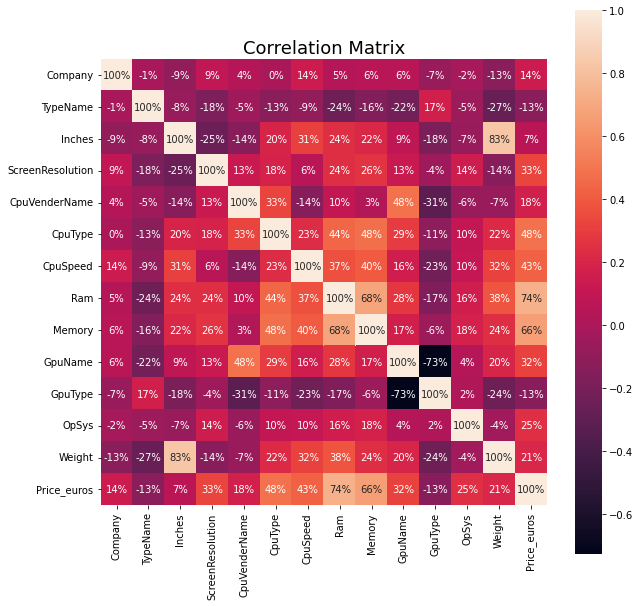

In [47]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',size=18)
sns.heatmap(laptop.corr(),fmt='.0%',square=True,annot=True)

Correlation of 'TypeName' and 'GpuType' both with other features and output gives negative value which is not required, so this feature need to be removed. 

***16.1 Removing 'TypeName' & 'GpuType' both feature column***

In [48]:
laptop=laptop.drop('TypeName',axis=1)
laptop=laptop.drop('GpuType',axis=1)
laptop.head()

,Company,Inches,ScreenResolution,CpuVenderName,CpuType,CpuSpeed,Ram,Memory,GpuName,OpSys,Weight,Price_euros
0,1,13.3,23,1,40,2.3,8.0,10,2,8,1.37,1339.69
1,1,13.3,1,1,40,1.8,8.0,9,2,8,1.34,898.94
2,7,15.6,8,1,46,2.5,8.0,18,2,0,1.86,575.00
3,1,15.4,25,1,54,2.7,16.0,27,0,8,1.83,2537.45
4,1,13.3,23,1,40,3.1,8.0,18,2,8,1.37,1803.60


***16.2 Exporting this encoded dataframe for further use in web application***

In [49]:
laptop.to_csv('laptop_encoded.csv')

#17. Splitting input data and output data

In [50]:
x=laptop.iloc[:,:11]
y=laptop.iloc[:,11]

#18. Splitting the dataset into train and test 

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

#19. Train machine using Multiple Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#20. Predict Output value

In [53]:
y_pred=lr.predict(x_test)
type(y_test)

pandas.core.series.Series

#21. Calculate Error using RMSE

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 418.1845732060972


#22. Calculate Error using R2 Score

In [55]:
R2_Score=r2_score(y_test, y_pred)
print("R2_Score:",R2_Score)

R2_Score: 0.6711797440562828


#23. Train machine using RandomForest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=41,max_depth=18)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, random_state=41)

#24. Predict Output value

In [57]:
y1_pred=rfr.predict(x_test)

#25. Calculate Error using RMSE

In [58]:
RMSE1=np.sqrt(mean_squared_error(y1_pred,y_test))
print("RMSE:",RMSE1)

RMSE: 280.07481612410487


#26. Calculate Error using R2 Score

In [59]:
R2_Score1=r2_score(y_test, y1_pred)
print("R2_Score:",R2_Score1)

R2_Score: 0.8525072521758814


#27. Train machine using XGBoost(eXtreme Gradient Boost) Regressor

In [60]:
from xgboost import XGBRegressor
xgb=XGBRegressor(learning_rate=.05,n_estimators=480)
xgb.fit(x_train,y_train)

[12:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=480)

#28. Predict Output value

In [61]:
y2_pred=xgb.predict(x_test)

#29. Calculate Error using RMSE

In [62]:
RMSE2=np.sqrt(mean_squared_error(y2_pred,y_test))
print("RMSE:",RMSE2)

RMSE: 272.5299476995923


#30. Calculate Error using R2 Score

In [63]:
R2_Score2=r2_score(y_test, y2_pred)
print("R2_Score:",R2_Score2)

R2_Score: 0.860346760808087


#31. Creating a copy of train and test dataset of original dataframe(non-encoded dataset)

***31.1 Splitting input data and output data***

In [64]:
x1=laptop1.iloc[:,:13]
y1=laptop1.iloc[:,13]

***32.2 Splitting the dataset into train and test***

In [65]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.25,random_state=42)

***32.3 Testing equality of two train and test dataset***

In [66]:
y_test1=pd.DataFrame(y_test)     #Convering into dataframe
y1_test1=pd.DataFrame(y1_test)   #Convering into dataframe
y_test1.equals(y1_test1)

True

It is True, so two dataset is equal

#33. Predicted price visualization 

***33.1 Company vs Laptop Price***

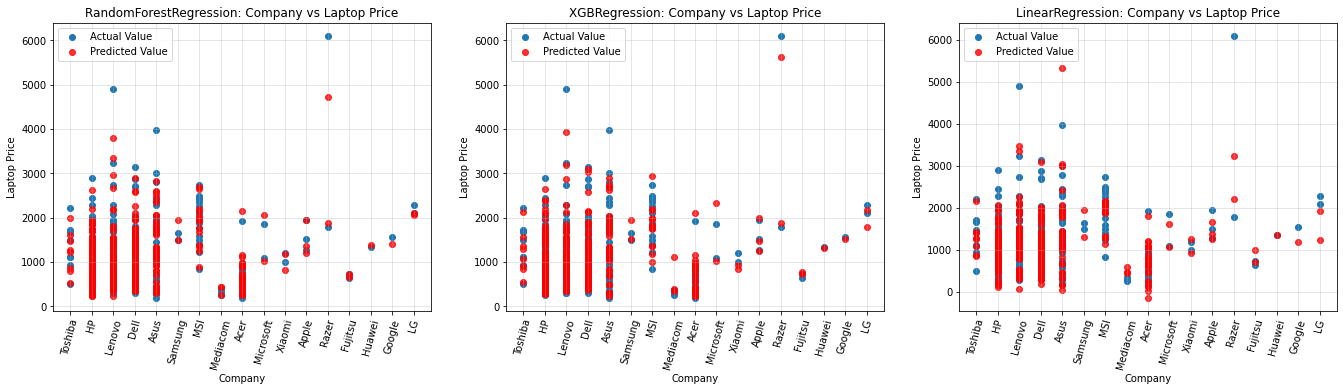

In [67]:
Company=x1_test.iloc[:,0]
y1_test=np.array(y1_test,)
plt.figure(figsize=(23,18))
plt.subplot(3,3,1)
plt.scatter(Company,y1_test,alpha=1)
Company1=x1_test.iloc[:,0]
plt.scatter(Company1,y1_pred,color='red',alpha=.8)
plt.xticks(rotation=75)
plt.title('RandomForestRegression: Company vs Laptop Price')
plt.xlabel('Company')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.4)

plt.subplot(3,3,2)
plt.scatter(Company,y1_test,alpha=1)
Company1=x1_test.iloc[:,0]
plt.scatter(Company1,y2_pred,color='red',alpha=.8)
plt.xticks(rotation=75)
plt.title('XGBRegression: Company vs Laptop Price')
plt.xlabel('Company')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.4)

plt.subplot(3,3,3)
plt.scatter(Company,y1_test,alpha=1)
Company1=x1_test.iloc[:,0]
plt.scatter(Company1,y_pred,color='red',alpha=.8)
plt.xticks(rotation=75)
plt.title('LinearRegression: Company vs Laptop Price')
plt.xlabel('Company')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.4)
plt.show()

***33.2 OS vs Laptop price***

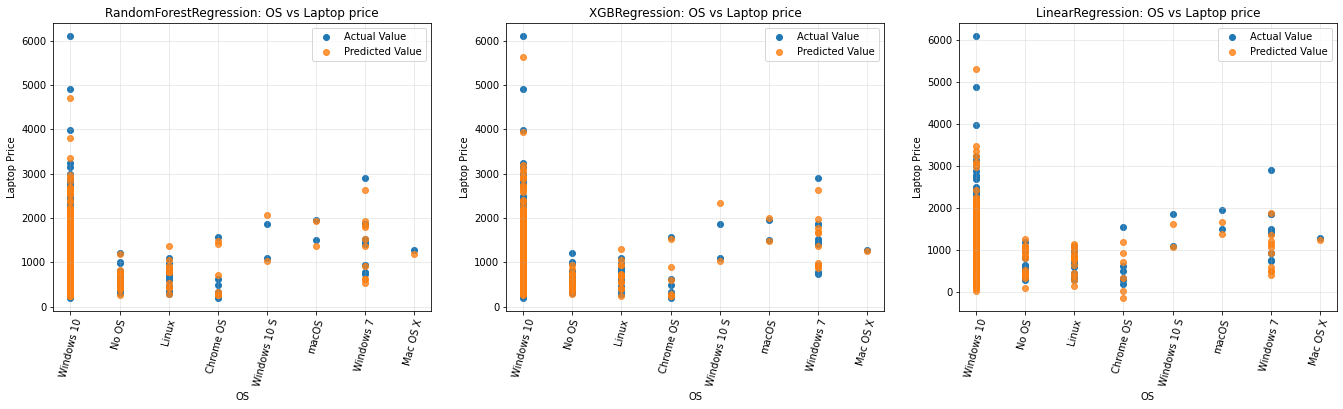

In [68]:
OS=x1_test.iloc[:,11]
plt.figure(figsize=(23,18))
plt.subplot(3,3,1)
plt.scatter(OS,y1_test)
OS1=x1_test.iloc[:,11]
plt.scatter(OS1,y1_pred,alpha=.8)
plt.xticks(rotation=75)
plt.title('RandomForestRegression: OS vs Laptop price')
plt.xlabel('OS')
plt.ylabel('Laptop Price')
plt.grid(alpha=.3)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,2)
plt.scatter(OS,y1_test)
OS1=x1_test.iloc[:,11]
plt.scatter(OS1,y2_pred,alpha=.8)
plt.xticks(rotation=75)
plt.title('XGBRegression: OS vs Laptop price')
plt.xlabel('OS')
plt.ylabel('Laptop Price')
plt.grid(alpha=.3)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,3)
plt.scatter(OS,y1_test)
OS1=x1_test.iloc[:,11]
plt.scatter(OS1,y_pred,alpha=.8)
plt.xticks(rotation=75)
plt.title('LinearRegression: OS vs Laptop price')
plt.xlabel('OS')
plt.ylabel('Laptop Price')
plt.grid(alpha=.3)
plt.legend(['Actual Value','Predicted Value'])
plt.show()

***33.3 Type vs Laptop Price***

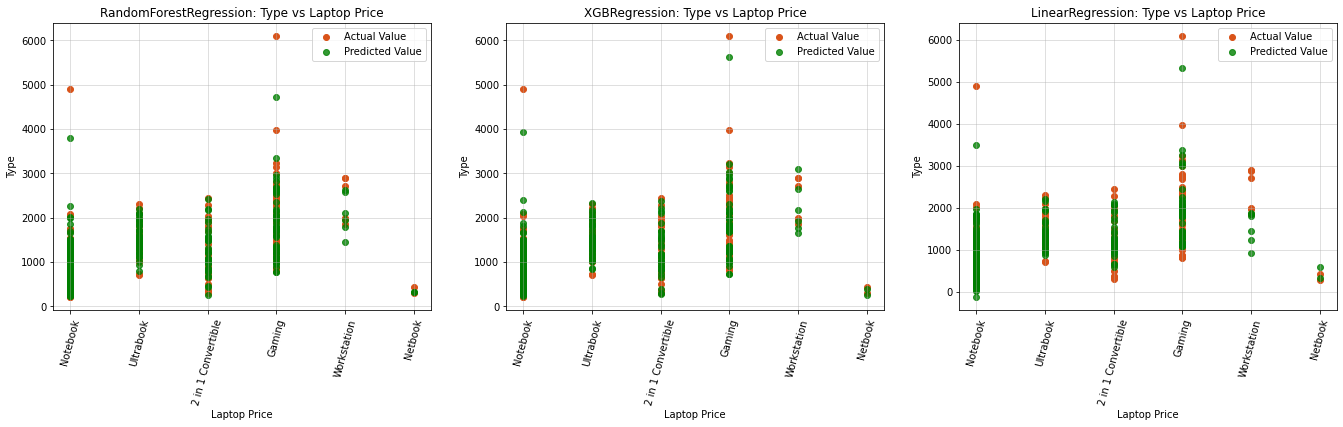

In [69]:
Types=x1_test.iloc[:,1]
plt.figure(figsize=(23,18))
plt.subplot(3,3,1)
plt.scatter(Types,y1_test,color=[0.8500, 0.3250, 0.0980])
Types1=x1_test.iloc[:,1]
plt.scatter(Types1,y1_pred,alpha=.8,color='green')
plt.xticks(rotation=75)
plt.title('RandomForestRegression: Type vs Laptop Price')
plt.ylabel('Type')
plt.xlabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,2)
plt.scatter(Types,y1_test,color=[0.8500, 0.3250, 0.0980])
Types1=x1_test.iloc[:,1]
plt.scatter(Types1,y2_pred,alpha=.8,color='green')
plt.xticks(rotation=75)
plt.title('XGBRegression: Type vs Laptop Price')
plt.ylabel('Type')
plt.xlabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,3)
plt.scatter(Types,y1_test,color=[0.8500, 0.3250, 0.0980])
Types1=x1_test.iloc[:,1]
plt.scatter(Types1,y_pred,alpha=.8,color='green')
plt.xticks(rotation=75)
plt.title('LinearRegression: Type vs Laptop Price')
plt.ylabel('Type')
plt.xlabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])
plt.show()

***33.4 Storage vs Laptop Price***

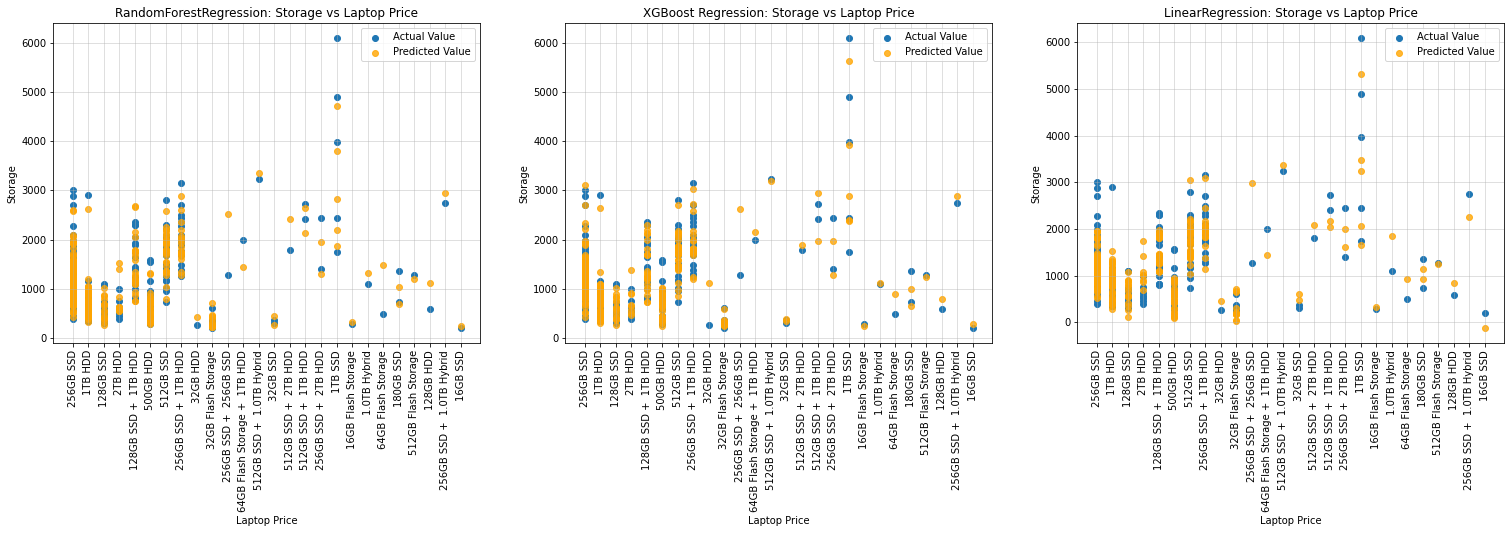

In [70]:
Memory=x1_test.iloc[:,8]
plt.figure(figsize=(26,20))
plt.subplot(3,3,1)
plt.scatter(Memory,y1_test)
Memory1=x1_test.iloc[:,8]
plt.scatter(Memory1,y1_pred,alpha=.8,color='orange')
plt.xticks(rotation=90,size=10)
plt.title('RandomForestRegression: Storage vs Laptop Price')
plt.ylabel('Storage')
plt.xlabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.5)

plt.subplot(3,3,2)
plt.scatter(Memory,y1_test)
Memory1=x1_test.iloc[:,8]
plt.scatter(Memory1,y2_pred,alpha=.8,color='orange')
plt.xticks(rotation=90,size=10)
plt.title('XGBoost Regression: Storage vs Laptop Price')
plt.ylabel('Storage')
plt.xlabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.5)
# plt.show()

plt.subplot(3,3,3)
# plt.figure(figsize=(11,5.5))
plt.scatter(Memory,y1_test)
Memory1=x1_test.iloc[:,8]
plt.scatter(Memory1,y_pred,alpha=.8,color='orange')
plt.xticks(rotation=90,size=10)
plt.title('LinearRegression: Storage vs Laptop Price')
plt.ylabel('Storage')
plt.xlabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.grid(alpha=.5)
plt.show()

***33.5 RAM vs Laptop Price***

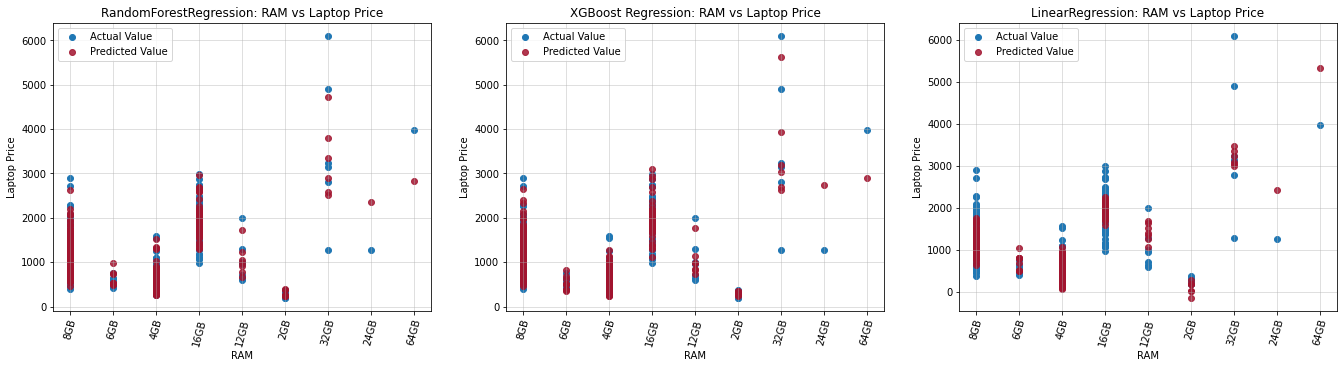

In [71]:
Ram=x1_test.iloc[:,7]
plt.figure(figsize=(23,18))
plt.subplot(3,3,1)
plt.scatter(Ram,y1_test)
Ram1=x1_test.iloc[:,7]
plt.scatter(Ram1,y1_pred,alpha=.85,color=[0.6350, 0.0780, 0.1840])
plt.xticks(rotation=75)
plt.title('RandomForestRegression: RAM vs Laptop Price')
plt.xlabel('RAM')
plt.ylabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,2)
plt.scatter(Ram,y1_test)
Ram1=x1_test.iloc[:,7]
plt.scatter(Ram1,y2_pred,alpha=.85,color=[0.6350, 0.0780, 0.1840])
plt.xticks(rotation=75)
plt.title('XGBoost Regression: RAM vs Laptop Price')
plt.xlabel('RAM')
plt.ylabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,3)
plt.scatter(Ram,y1_test)
Ram1=x1_test.iloc[:,7]
plt.scatter(Ram1,y_pred,alpha=.85,color=[0.6350, 0.0780, 0.1840])
plt.xticks(rotation=75)
plt.title('LinearRegression: RAM vs Laptop Price')
plt.xlabel('RAM')
plt.ylabel('Laptop Price')
plt.grid(alpha=.5)
plt.legend(['Actual Value','Predicted Value'])
plt.show()

***33.6 CpuSpeed vs Laptop Price***

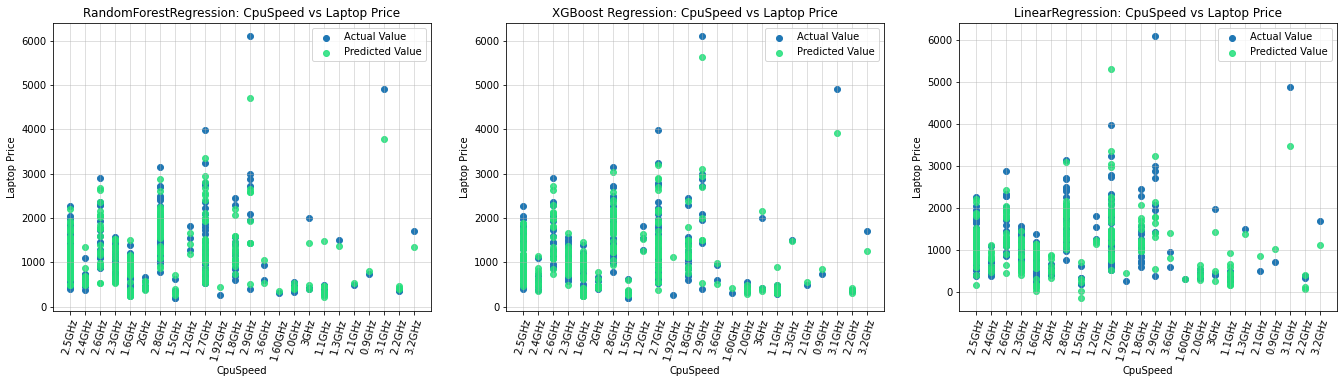

In [72]:
import math
cs=x1_test.iloc[:,6]
plt.figure(figsize=(23,18))
plt.subplot(3,3,1)
plt.scatter(cs,y1_test)
cs1=x1_test.iloc[:,6]
plt.scatter(cs1,y1_pred,alpha=.85,color=[0.1350, 0.8780, .4840])
plt.xticks(rotation=75)
plt.grid(alpha=.5)
plt.title('RandomForestRegression: CpuSpeed vs Laptop Price')
plt.xlabel('CpuSpeed')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,2)
plt.scatter(cs,y1_test)
cs1=x1_test.iloc[:,6]
plt.scatter(cs1,y2_pred,alpha=.85,color=[0.1350, 0.8780, .4840])
plt.title('XGBoost Regression: CpuSpeed vs Laptop Price')
plt.xticks(rotation=75)
plt.grid(alpha=.5)
plt.xlabel('CpuSpeed')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])

plt.subplot(3,3,3)
plt.scatter(cs,y1_test)
cs1=x1_test.iloc[:,6]
plt.scatter(cs1,y_pred,alpha=.85,color=[0.1350, 0.8780, .4840])
plt.title('LinearRegression: CpuSpeed vs Laptop Price')
plt.xticks(rotation=75)
plt.grid(alpha=.5)
plt.xlabel('CpuSpeed')
plt.ylabel('Laptop Price')
plt.legend(['Actual Value','Predicted Value'])
plt.show()

#34. Train machine using LASSO(Least Absolute Shrinkage and Selection Operator) Regression 

***34.1 Importing module***

In [73]:
from sklearn.linear_model import Lasso

***34.2 Creating a list of 1000 learning rate from o to 100 and creating a list of R2_Score based on predicted price***

In [74]:
cof=[]
r2=[]
a=np.linspace(0,50,1000)
for i in a:
  lasso=Lasso(alpha=i)
  lasso.fit(x_train,y_train)
  y3_pred=lasso.predict(x_test)
  R2_Score=r2_score(y_test,y3_pred)
  r2.append(R2_Score)
  cof.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.337e+07, tolerance: 4.625e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

***34.3 Display maximum and minimum R2_Score***

In [75]:
print('MAX: ',max(r2),'Index: ',r2.index(max(r2)))
print('MIN: ',min(r2),'Index: ',r2.index(min(r2)))

MAX:  0.6711797440562828 Index:  0
MIN:  0.6435087998663562 Index:  999


***34.4 Visualisation: Feature selection, Alpha(Learning rate) vs R2_Score***

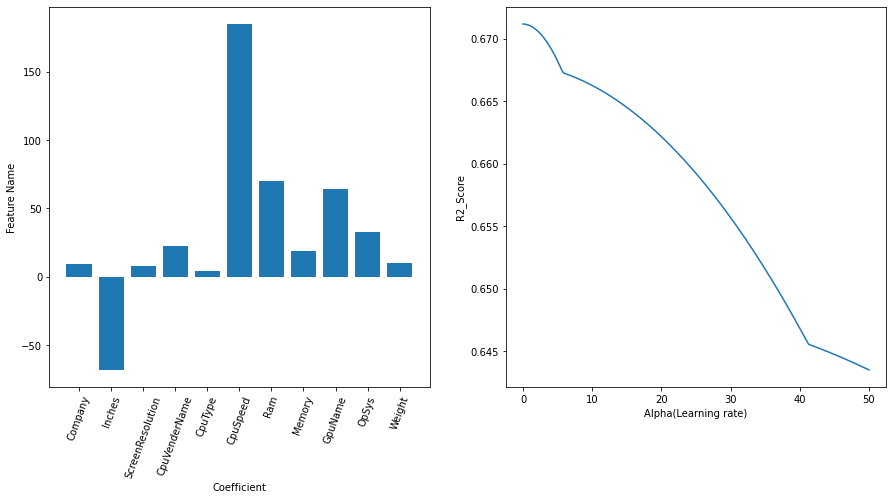

In [76]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(x.keys(),cof[99])
plt.xticks(rotation=70)
plt.xlabel('Coefficient')
plt.ylabel('Feature Name')
plt.subplot(1,2,2)
plt.plot(a,r2)
plt.xlabel('Alpha(Learning rate)')
plt.ylabel('R2_Score')
plt.show()

*When the alpha(learning rate)=0, R2_Score is maximum.As the amount of alpha(learning rate) incrases, the R2_Score decreases.*
*For numerical reasons, using alpha = 0 with the Lasso object is not advised, it act as a linear regression. So we should use the LinearRegression object.*

#35. Comparison between three regression algorithms

***35.1 Compare: R2_Score***

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

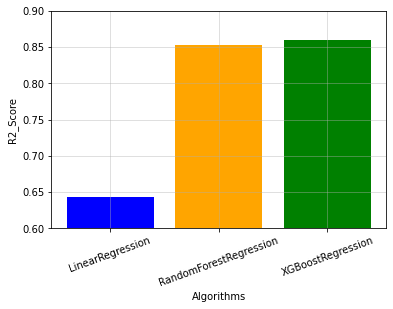

In [77]:
plt.bar(['LinearRegression','RandomForestRegression','XGBoostRegression'],[R2_Score,R2_Score1,R2_Score2],color=['blue','orange','green'])
plt.xlabel('Algorithms')
plt.ylabel('R2_Score')
plt.ylim(.6,.9)
plt.grid(alpha=.5)
plt.xticks(rotation=20)

*LinearRegression gives less R2_Score .67 but best of them is XGBoostRegression with R2_Score .86*

***35.2 Compare: RMSE***

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

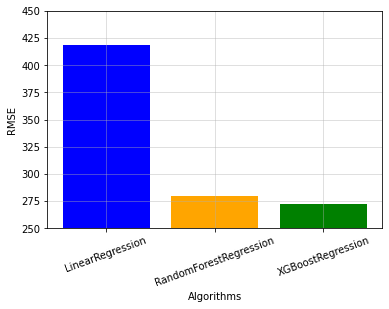

In [78]:
plt.bar(['LinearRegression','RandomForestRegression','XGBoostRegression'],[RMSE,RMSE1,RMSE2],color=['blue','orange','green'])
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.ylim(250,450)
plt.grid(alpha=.5)
plt.xticks(rotation=20)

*LinearRegression gives more RMS Error 418.18, and XGBoost Regression gives less RMS Error 272.52*